This is own implementation of Udacity iSDC's optional project "Reconstructing Trajectories".  

**Given data:**

| timestamp | displacement  | yaw_rate | acceleration |
| :-------: | :----------: | :------: | :----------: |
| 0.0 | 0 | 0.0 | 0.0 |
| 0.25 | 0.0 | 0.0 | 19.6 |
| 0.5 | 1.225 | 0.0 | 19.6 |
| 0.75 | 3.675 | 0.0 | 19.6 |
| 1.0 | 7.35 | 0.0 | 19.6 |
| 1.25 | 12.25 | 0.0 | 0.0 |
| 1.5 | 17.15 | -2.82901631903 | 0.0 |
| 1.75 | 22.05 | -2.82901631903 | 0.0 |
| 2.0 | 26.95 | -2.82901631903 | 0.0 |
| 2.25 | 31.85 | -2.82901631903 | 0.0 |
| 2.5 | 36.75 | -2.82901631903 | 0.0 |
| 2.75 | 41.65 | -2.82901631903 | 0.0 |
| 3.0 | 46.55 | -2.82901631903 | 0.0 |
| 3.25 | 51.45 | -2.82901631903 | 0.0 |
| 3.5 | 56.35 | -2.82901631903 | 0.0 |

In [1]:
from helpers import process_data
%matplotlib inline

data_list = process_data("trajectory_example.pickle")

for entry in data_list:
    print(entry)

(0.0, 0, 0.0, 0.0)
(0.25, 0.0, 0.0, 19.6)
(0.5, 1.225, 0.0, 19.6)
(0.75, 3.6750000000000003, 0.0, 19.6)
(1.0, 7.3500000000000005, 0.0, 19.6)
(1.25, 12.25, 0.0, 0.0)
(1.5, 17.15, -2.8290163190291664, 0.0)
(1.75, 22.049999999999997, -2.8290163190291664, 0.0)
(2.0, 26.949999999999996, -2.8290163190291664, 0.0)
(2.25, 31.849999999999994, -2.8290163190291664, 0.0)
(2.5, 36.74999999999999, -2.8290163190291664, 0.0)
(2.75, 41.64999999999999, -2.8290163190291664, 0.0)
(3.0, 46.54999999999999, -2.8290163190291664, 0.0)
(3.25, 51.44999999999999, -2.8290163190291664, 0.0)
(3.5, 56.34999999999999, -2.8290163190291664, 0.0)


To solve:
```python
def get_speeds(data_list):
    return 

def get_headings(data_list):
    return 

def get_x_y(data_list):
    return

def show_x_y(data_list):
    return
```
## get_speeds

First let us focus on ```get_speeds```. We have displacement in data set. So if we differentiate at, every $ \Delta t$, we get speed at that instant. Below is our differentiation snippet we already have from previous section (Implement an Accelerometer). Let us try that out
```python
def get_derivative_from_data(position_data, time_data):
    
    if (len(position_data) != len(time_data)):
        raise ValueError('Arguments length not matching')
        
    prev_pos = position_data[0]
    prev_tim = time_data[0]
    
    slopes = []
    
    for i in range(1,len(position_data)):
        
        curr_pos = position_data[i]
        curr_tim = time_data[i]
        
        delta_pos = curr_pos - prev_pos
        delta_tim = curr_tim - prev_tim
        
        slope = delta_pos/delta_tim
        
        slopes.append(slope)
        
        prev_pos = curr_pos
        prev_tim = curr_tim
    
    return slopes
```

In [2]:
def get_derivative_from_data(position_data, time_data):
    
    if (len(position_data) != len(time_data)):
        raise ValueError('Arguments length not matching')
        
    prev_pos = position_data[0]
    prev_tim = time_data[0]
    
    slopes = [0]  # assuming initial speed as zero
    
    for i in range(1,len(position_data)):
        
        curr_pos = position_data[i]
        curr_tim = time_data[i]
        
        delta_pos = curr_pos - prev_pos
        delta_tim = curr_tim - prev_tim
        
        slope = delta_pos/delta_tim
        
        slopes.append(slope)
        
        prev_pos = curr_pos
        prev_tim = curr_tim
    
    return slopes

def get_speeds(data_list):
    
    t = [row[0] for row in data_list]  # time 't'
    z = [row[1] for row in data_list]  # displacement at 't'
    
    return get_derivative_from_data(z,t)

v = get_speeds(data_list)

#checking
for each_speed in v:
    print(each_speed)

0
0.0
4.9
9.8
14.700000000000001
19.599999999999998
19.599999999999994
19.599999999999994
19.599999999999994
19.599999999999994
19.599999999999994
19.599999999999994
19.599999999999994
19.599999999999994
19.599999999999994


Let us test it out using Udacity's test cases

In [3]:
from testing import test_get_speeds 

test_get_speeds(get_speeds)

PASSED test of get_speeds function!


Cool. It seems to work!

## get_headings

Headings is about angle. We have ```yaw_rate``` which is $ \displaystyle \frac{{d\theta }}{{dt}}$  

Integrating it over any $\Delta t$, should give us $\theta$ on that interval. We did integration as well earlier in "Integrating Rate Gyro Data". Below is the snippet. 

```python
def get_integral_from_data(data, times):

    if (len(data) != len(times)):
        raise ValueError("Arguments must be of equal length")
        
    total_area = 0    
    area_trace = []   # we need to generate a list of cumulative area sums till any instant
    
    prev_tim = times[0]
    for i in range(1, len(times)):
        
        curr_tim = times[i]
        
        delta_t = curr_tim - prev_tim
        delta_x = data[i]  # its just the height, as rectangle, same at both curr and prev instances
        
        area = delta_t * delta_x
        
        total_area += area
        
        prev_tim = curr_tim
        
        area_trace.append(total_area)
            
    return area_trace
```

In [4]:
def get_integral_from_data(data, times):
    # TODO - write integration code!

    if (len(data) != len(times)):
        raise ValueError("Arguments must be of equal length")
        
    total_area = 0    
    area_trace = [0]   # we need to generate a list of cumulative area sums till any instant
    
    prev_tim = times[0]
    for i in range(1, len(times)):
        
        curr_tim = times[i]
        
        delta_t = curr_tim - prev_tim
        delta_x = data[i]  # its just the height, as rectangle, same at both curr and prev instances
        
        area = delta_t * delta_x
        
        total_area += area
        
        prev_tim = curr_tim
        
        area_trace.append(total_area)
            
    return area_trace

def get_headings(data_list):
    
    t = [row[0] for row in data_list]  # time 't'
    y = [row[2] for row in data_list]  # yaw rate at 't'    
    
    return get_integral_from_data(y,t)

y = get_headings(data_list)

#checking
for each_yaw in y:
    print(each_yaw)

0
0.0
0.0
0.0
0.0
0.0
-0.7072540797572916
-1.4145081595145832
-2.1217622392718747
-2.8290163190291664
-3.536270398786458
-4.243524478543749
-4.950778558301041
-5.658032638058332
-6.365286717815623


Let us test it out using Udacity's test cases

In [5]:
from testing import test_get_headings

test_get_headings(get_headings)

PASSED test of get_headings function!


Cool, that works too!

## get_x_y

Hmm. This looks tricky. At every t, we have position, and yaw (derived just now). What if we drive using ```Vehicle``` class we implemented earlier, and get that class's X and Y? Below is our Vehicle class, and I have added additional ```get_trajectory``` to get the history, to cross check if our answer is correct.

In [6]:
import numpy as np
from math import sin, cos, pi
from matplotlib import pyplot as plt

class Vehicle:
    def __init__(self):
        self.x       = 0.0 # meters
        self.y       = 0.0
        self.heading = 0.0 # radians
        self.history = []
        
    def drive_forward(self, displacement):
        """
        Updates x and y coordinates of vehicle based on 
        heading and appends previous (x,y) position to
        history.
        """
        self.history.append((self.x, self.y))
        self.x += displacement * cos(self.heading)
        self.y += displacement * sin(self.heading)
    
    def set_heading(self, heading_in_degrees):
        """
        Sets the current heading (in radians) to a new value
        based on heading_in_degrees. Vehicle heading is always
        between 0 and 2 * pi.
        """
        heading_in_degrees = heading_in_degrees % 360 # just to be sure its always within 360
        self.heading = heading_in_degrees*pi/180
    
    def turn(self, angle_in_degrees):
        """
        Changes the vehicle's heading by angle_in_degrees. Vehicle 
        heading is always between 0 and 2 * pi.
        """
        self.heading += angle_in_degrees*pi/180
    
    def show_trajectory(self):
        """
        Creates a scatter plot of vehicle's trajectory.
        """
        X = [row[0] for row in self.history]
        Y = [row[1] for row in self.history]
        
        # DO NOT FORGET TO INCLUDE CURRENT POSITION AS WELL
        X.append(self.x)
        Y.append(self.y)        
        
        plt.scatter(X,Y)
        plt.plot(X,Y)
        plt.show()
        
    def get_trajectory(self):
        """
        returns vehicle's trajectory.
        """
        X = [row[0] for row in self.history]
        Y = [row[1] for row in self.history]
        
        # DO NOT FORGET TO INCLUDE CURRENT POSITION AS WELL
        X.append(self.x)
        Y.append(self.y)        
        
        return zip(X,Y)

Before we drive(?!), let us recap our data set, along with derived ones as well (speed and yaw). 

| timestamp | displacement | speed | yaw_rate     | yaw          | acceleration |
|-----------|--------------|-------|--------------|--------------|--------------|
| 0         | 0            | 0     | 0            | 0            | 0            |
| 0.25      | 0            | 0     | 0            | 0            | 19.6         |
| 0.5       | 1.225        | 4.9   | 0            | 0            | 19.6         |
| 0.75      | 3.675        | 9.8   | 0            | 0            | 19.6         |
| 1         | 7.35         | 14.7  | 0            | 0            | 19.6         |
| 1.25      | 12.25        | 19.6  | 0            | 0            | 0            |
| 1.5       | 17.15        | 19.6  | -2.829016319 | -0.70725408  | 0            |
| 1.75      | 22.05        | 19.6  | -2.829016319 | -1.41450816  | 0            |
| 2         | 26.95        | 19.6  | -2.829016319 | -2.121762239 | 0            |
| 2.25      | 31.85        | 19.6  | -2.829016319 | -2.829016319 | 0            |
| 2.5       | 36.75        | 19.6  | -2.829016319 | -3.536270399 | 0            |
| 2.75      | 41.65        | 19.6  | -2.829016319 | -4.243524479 | 0            |
| 3         | 46.55        | 19.6  | -2.829016319 | -4.950778558 | 0            |
| 3.25      | 51.45        | 19.6  | -2.829016319 | -5.658032638 | 0            |
| 3.5       | 56.35        | 19.6  | -2.829016319 | -6.365286718 | 0            |

Thank you [thisdavej](http://thisdavej.com/copy-table-in-excel-and-paste-as-a-markdown-table/) for excel to markdown conversion.  

<u>Question:</u> Can we take the displacement and yaw values from above, "drive" the Vehicle and get desired result? Let us check out. Note, our yaw is in radians, but ```Vehicle``` needs degrees, so we convert on the fly, by multiplying with ```(180/pi)```.

<pre>
At every time instant
    1. drive forward as per observed <b>displacement</b> value at that instant
    2. turn as per <b>yaw</b> value at that instant
</pre>

We might be one time stamp lagging, because at any instant, vehicle is already displaced by displacement value at that instant, but we are only displacing at that instant, which means resultant location is only at next instant. Still, let us see if it gives any useful result. For reference, expected result is as below (arrow viz later)

**Expected result:**
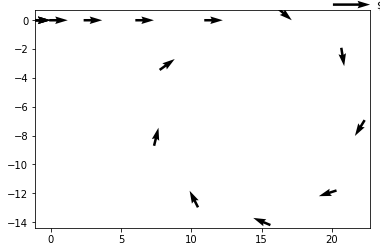

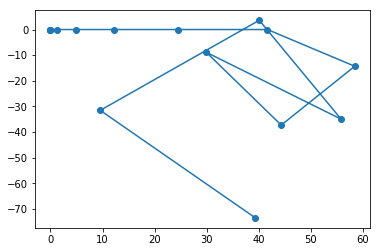

In [7]:
data_list = process_data("trajectory_example.pickle")    
t = [row[0] for row in data_list]
z = [row[1] for row in data_list]
yr = get_headings(data_list)

v = Vehicle()
for each_time_index in range(len(t)-1):    
    v.drive_forward(z[each_time_index])    
    v.turn(yr[each_time_index]*(180/pi))

X_Y = list(v.get_trajectory())
X = [row[0] for row in X_Y]
Y = [row[1] for row in X_Y]
plt.scatter(X,Y)
plt.plot(X,Y)
plt.show()

It started somewhere like reference, but then "drove" like a drunk person?! What went wrong? 

### Correction 1:

Note the yaw value we obtained is, from absolute frame of reference. Or in other words, its already cumulative from frame of reference. With ```turn``` command, we only **add** to the existing anle of the car. Instead, we should **set** the angle of the car at any instant. Let us try with that now. 

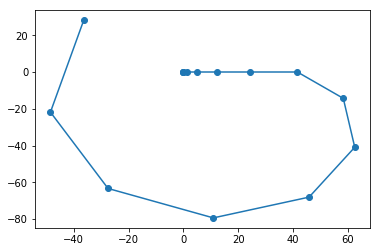

In [8]:
data_list = process_data("trajectory_example.pickle")    
t = [row[0] for row in data_list]
z = [row[1] for row in data_list]
yr = get_headings(data_list)

v = Vehicle()
for each_time_index in range(len(t)-1):    
    v.drive_forward(z[each_time_index])    
    v.set_heading(yr[each_time_index]*(180/pi))  # at every instant,we "set" angle caz its already cumulative

X_Y = list(v.get_trajectory())
X = [row[0] for row in X_Y]
Y = [row[1] for row in X_Y]
plt.scatter(X,Y)
plt.plot(X,Y)
plt.show()

Now it looks far better! Still, it is not yet similar to our reference. What still is going wrong? 

### Correction 2:

The original displacement value is also cumulative, or referenced from the beginning. It is not delta displacement between an instant and its previous instant. But what we feed ```Vehicle```, when we drive forward is relative displacement from its current position at any instant.  

So  we need to create another list, with relative displacement and feed that. Let us try it out.

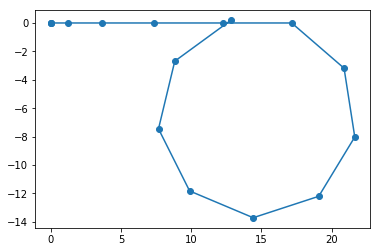

In [9]:
data_list = process_data("trajectory_example.pickle")    
t = [row[0] for row in data_list]
z = [row[1] for row in data_list]
yr = get_headings(data_list)

# relative displacement derivation
rel_z = [0]
for i in range(1,len(data_list)):
    delta_z = data_list[i][1]-data_list[i-1][1]
    rel_z.append(delta_z)

v = Vehicle()
for each_time_index in range(len(t)):
    v.drive_forward(rel_z[each_time_index])      # feeding relative displacement now..
    v.set_heading(yr[each_time_index]*(180/pi))    

X_Y = list(v.get_trajectory())
X = [row[0] for row in X_Y]
Y = [row[1] for row in X_Y]
plt.scatter(X,Y)
plt.plot(X,Y)
plt.show()

Now this looks way similar to our reference. Check out the comparision below. 
<div style='display:flex'>
    <div><img src='https://s15.postimg.cc/vzb66yu0r/image.png'></div><pre>    </pre>    
    <div><img src='https://s15.postimg.cc/pmw0wqdzf/image.png'></div>
</div>

<font color='red'>Note:</font> If you observe both above visualizations, you might notice few points differ, though overall the shape resembles solution. In fact it differs a little. But its close enough, good enough that Udacity tests score them as pass. 

Let us wrap our current solution under get_x_y and run Udacity's test.

In [10]:
from helpers import process_data
from testing import test_get_x_y
import solution

data_list = process_data("trajectory_example.pickle")    

def get_x_y(data_list):
    
    t = [row[0] for row in data_list]
    z = [row[1] for row in data_list]
    yr = get_headings(data_list)

    # relative displacement derivation
    rel_z = [0]
    for i in range(1,len(data_list)):
        delta_z = data_list[i][1]-data_list[i-1][1]
        rel_z.append(delta_z)

    # create our vehicle for test drive to generate X,Y
    v = Vehicle()    
    
    for each_time_index in range(len(t)):
        v.drive_forward(rel_z[each_time_index])      # feeding relative displacement now..        
        v.set_heading(yr[each_time_index]*(180/pi))    
        
    X_Y = v.get_trajectory()
    return list(X_Y)[1:]

X_Y = get_x_y(data_list)
#print('Our solution: ')
#[print(row[0],'\t',row[1]) for row in X_Y]
#print('Udacity solution: ')
#[print(row[0],'\t',row[1]) for row in solution.get_x_y(data_list)]
test_get_x_y(get_x_y)

PASSED test of get_x_y function!


Cool. Looks like our code works!

Let us wrap all above solutions in an external file, and reference that, to modularize our implementation. I have moved the helper functions and vehicle classes to [solution_parthi2929.py](https://gist.github.com/parthi2929/199c3f8b11a7960ca3f29fb457f11152). Now our  simplified implementation looks like below. 

In [11]:
from solution_parthi2929 import Vehicle, get_derivative_from_data, get_integral_from_data
from math import pi

def get_speeds(data_list):
    t = [row[0] for row in data_list]  # time 't'
    z = [row[1] for row in data_list]  # displacement at 't'    
    return get_derivative_from_data(z,t)

def get_headings(data_list):
    t = [row[0] for row in data_list]  # time 't'
    y = [row[2] for row in data_list]  # yaw rate at 't'        
    return get_integral_from_data(y,t)

def get_x_y(data_list):
    t = [row[0] for row in data_list]
    z = [row[1] for row in data_list]
    yr = get_headings(data_list)

    # relative displacement derivation
    rel_z = [0]
    for i in range(1,len(data_list)):
        delta_z = data_list[i][1]-data_list[i-1][1]
        rel_z.append(delta_z)

    # create our vehicle for test drive to generate X,Y
    v = Vehicle()    
    
    for each_time_index in range(len(t)):
        v.drive_forward(rel_z[each_time_index])      # feeding relative displacement now..        
        v.set_heading(yr[each_time_index]*(180/pi))    
        
    X_Y = v.get_trajectory()
    return list(X_Y)[1:]

def show_x_y(data_list):
    return

In [12]:
from testing import test_get_speeds, test_get_x_y, test_get_headings

test_get_speeds(get_speeds)

PASSED test of get_speeds function!


In [13]:
test_get_x_y(get_x_y)

PASSED test of get_x_y function!


In [14]:
test_get_headings(get_headings)

PASSED test of get_headings function!


Great. Let us next focus on improvising our visualization (arrows or vector graph) in next section. 

**Note:** It is possible, that we extract functionalities of Vehicle, instead of "driving it" to find out X and Y. That is what also done in Udacity. I wanted to show implementation re using already familiarized code snippets in earlier sections. Once we know what we know now, its easy to extract our driving as a function itself (instead of driving, just update X, Y, angle in series accordingly). 